In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
"""
Simulating a model leaky integrate-and-fire neuron
"""

'\nSimulating a model leaky integrate-and-fire neuron\n'

In [72]:
"""Defining the parameters"""
t0 = 0 #initial time
dt = 0.0001 #time steps in s
tmax = 2 #maximum time in s
El = -0.07 #leaky potential in volts
Rm = 5000 #membrane resistance in ohms
Cm = 0.000000002 #membrane capacitance in faraday
Vth = -0.05 # spike threshold in volts
Vreset = -0.065 #reset potential in volts
Gl = 0.00000001 #membrane conductance in siemens
ton = 0.90 #time to begin applied current (onset)
toff = 1.10 #time to end applied current (offset)
non = round(ton/dt)+1 #time-point index of current onset
noff = round(toff/dt)+1 #time-point index of current offset
fr = [] #firing rate

In [73]:
"""Arrays for time"""
tvec = np.linspace(t0, tmax, num = int(tmax/dt)) #array with time starting from 0 to 2s (step of 0.0001s)

In [86]:
"""Array with the applied currents (Iapp) and membrane potential"""
Iapp = [0.0000000005] #current to be applied
Ntrials = len(Iapp)
for trial in range(0,Ntrials):
    I = np.zeros(len(tvec))
    I[non:noff] = Iapp[trial]
    V = np.empty(len(tvec)) #create an array with the size of tvec
    V[0] = El #the first element of array V is the leaky potential
    spikes = np.zeros(len(tvec))

In [87]:
    """Updating the values of membrane potential"""
    for i in range(1,int(len(tvec))):
        tval = tvec[i]
        dVdt = (I[i] + Gl*(El - V[i-1]))/Cm #rate of change of membrane potential
        V[i] = V[i-1] + (dt*dVdt)
        if V[i] >= Vth:
            spikes[i] = 1
            V[i] = Vreset

In [88]:
    """Create a dataframe containing the data to make plot"""
    df = pd.DataFrame(data=[tvec, V, I, spikes]).T
    df.columns = ["Time", "Membrane Potential", "Current", "Spikes"]
    df.head()
    df.tail()

,Time,Membrane Potential,Current,Spikes
19995,1.9996,-0.069904,0.0,0.0
19996,1.9997,-0.069904,0.0,0.0
19997,1.9998,-0.069904,0.0,0.0
19998,1.9999,-0.069904,0.0,0.0
19999,2.0000,-0.069904,0.0,0.0


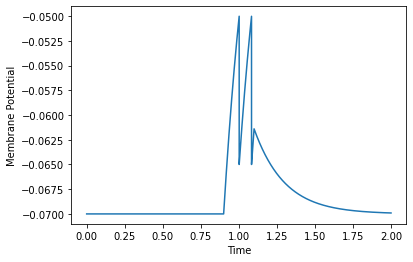

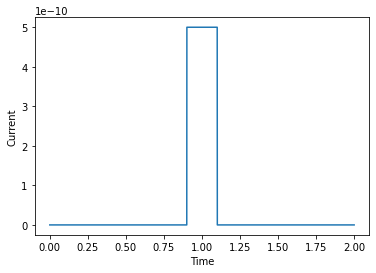

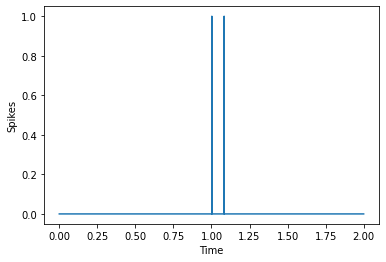

In [89]:
    """Plotting a graph membrane potential to time"""
    g = sns.lineplot(x="Time", y="Membrane Potential", data=df)
    plt.show()
    h = sns.lineplot(x="Time", y="Current", data=df)
    plt.show()
    i = sns.lineplot(x="Time", y="Spikes", data=df)
    plt.show() 